# Heart Attack Predictor
## Saeed Hosseini

<saeed144.73@gmail.com>


HAP is a code that can predict your heart attack possibility according to your gender, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa and thall.

Thanks to Jadi and Saeed Aghabozorgi from Google.

v1.0.0

7-Nov-2021

<h1 style="text-align: center; color: red;">START</h1>

<h2 style="display: inline;">Step 1)</h2><h2 style="display: inline; text-align: left; color: blue;">READ PURE DATA SET</h2>

In [34]:
import pandas as pd
users_df = pd.read_csv("heart_attack_dataset.csv")
users_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h2 style="display: inline;">Step 2)</h2><h2 style="display: inline; text-align: left; color: blue;">DATA CLEANSING</h2>

In [35]:
users_df.shape

(303, 14)

In [36]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [37]:
print("Number of NULLs = " + str(users_df.isnull().sum().sum()))

Number of NULLs = 0


**Fortunately there are no missing data**

<h2 style="display: inline;">Step 3)</h2><h2 style="display: inline; text-align: left; color: blue;">ANALYZE DATA</h2>

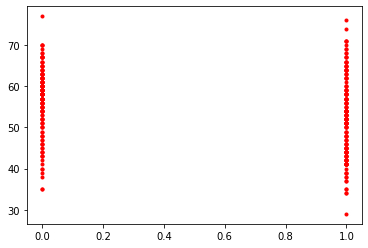

In [38]:
import matplotlib.pyplot as plt
plt.scatter(users_df['output'], users_df['age'], marker='.', color='r');

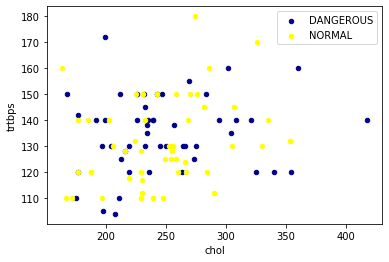

In [39]:
ax = users_df[users_df['output'] == 1][0:50].plot(kind='scatter', x='chol', y='trtbps', color='DarkBlue', label='DANGEROUS');
users_df[users_df['output'] == 0][0:50].plot(kind='scatter', x='chol', y='trtbps', color='Yellow', label='NORMAL', ax=ax);
plt.show()

In [40]:
import numpy as np
X = np.asarray(users_df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']])
X[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [42]:
Y = np.asarray(users_df['output'])
Y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

<h2 style="display: inline;">Step 4)</h2><h2 style="display: inline; text-align: left; color: blue;">ML Algorithms</h2>

**Because our data are multidimensional we choose the SVM algorithm**

Let's make our train and test data (80% for train and 20% for evaluation)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [45]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, Y_train) 

SVC()

In [46]:
yhat = svm_model.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

**After prediction, let's evaluate our model**

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.67      0.57      0.62        21
           1       0.79      0.85      0.82        40

    accuracy                           0.75        61
   macro avg       0.73      0.71      0.72        61
weighted avg       0.75      0.75      0.75        61

Confusion matrix, without normalization
[[34  6]
 [ 9 12]]


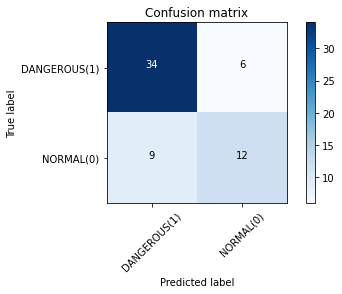

In [48]:
cnf_matrix = confusion_matrix(Y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['DANGEROUS(1)','NORMAL(0)'],normalize= False,  title='Confusion matrix')

In [49]:
from sklearn.metrics import f1_score
f1_score(Y_test, yhat, average='weighted') 

0.7490846108266609

In [52]:
from sklearn.metrics import jaccard_score
print(jaccard_score(Y_test, yhat,pos_label=1))
print(jaccard_score(Y_test, yhat,pos_label=0))

0.6938775510204082
0.4444444444444444


**Let's change our SVM kernel to see if our model become better or not**

In [61]:
new_svm_model = svm.SVC(kernel='linear')
new_svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [62]:
new_yhat = new_svm_model.predict(X_test)
new_yhat [0:5]

array([0, 1, 1, 1, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.90      0.95      0.93        40

    accuracy                           0.90        61
   macro avg       0.90      0.88      0.89        61
weighted avg       0.90      0.90      0.90        61

Confusion matrix, without normalization
[[38  2]
 [ 4 17]]


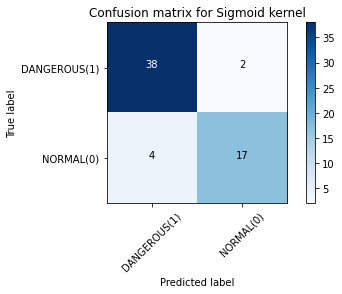

In [63]:
new_cnf_matrix = confusion_matrix(Y_test, new_yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(Y_test, new_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(new_cnf_matrix, classes=['DANGEROUS(1)','NORMAL(0)'],normalize= False,  title='Confusion matrix for Sigmoid kernel')

In [64]:
f1_score(Y_test, new_yhat, average='weighted')

0.9003798480607756

In [65]:
print(jaccard_score(Y_test, new_yhat, pos_label=1))
print(jaccard_score(Y_test, new_yhat, pos_label=0))

0.8636363636363636
0.7391304347826086


**Oh! Linear kernel predict much more better than RBF kernel**

f1_score(Linear) = 90%

f1_score(RBF) = 74%

False predictions for sensitive data(Linear) = 2 cases

False predictions for sensitive data(RBF) = 6 cases